1. Project IS 669 Big Data and Information Systems


### 2.All import statements

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality. data.features
y = wine_quality.data.targets

# variable information
url = 'https://archive.ics.uci.edu/static/public/186/data.csv'

# Reading the CSV file into a DataFrame
df = pd. read_csv(url)
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


### 3. Probabilistic Classifiier Code

In [4]:
# Assuming 'quality' column contains the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Mapping the labels for binary classification (e.g., 0: Low quality, 1: High quality)
y_binary = y.apply(lambda x: 0 if x <= 5 else 1)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Define transformers for numeric and categorical features
numeric_features = X.select_dtypes(include=['float64'])
categorical_features = X.select_dtypes(include=['object'])


# Standardizing (scale) numeric features using StandardScaler and handling unknown categories.
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combining transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)
    ])

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initializing and train the Gaussian Naive Bayes model
base_model = GaussianNB()
base_model.fit(X_train_preprocessed, y_train)

# Initializing and train the calibrated classifier
calibrated_model = CalibratedClassifierCV(base_model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train_preprocessed, y_train)

# Predicting the probabilities on the test set
y_prob = calibrated_model.predict_proba(X_test_preprocessed)[:, 1]

# Converting probabilities to binary predictions based on a threshold (e.g., 0.5)
y_pred = (y_prob > 0.5).astype(int)

# Evaluating the model
probabilistic_accuracy = accuracy_score(y_test, y_pred)
conf_matrix_probabilistic = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



### 4. Probabilistic Classification Results

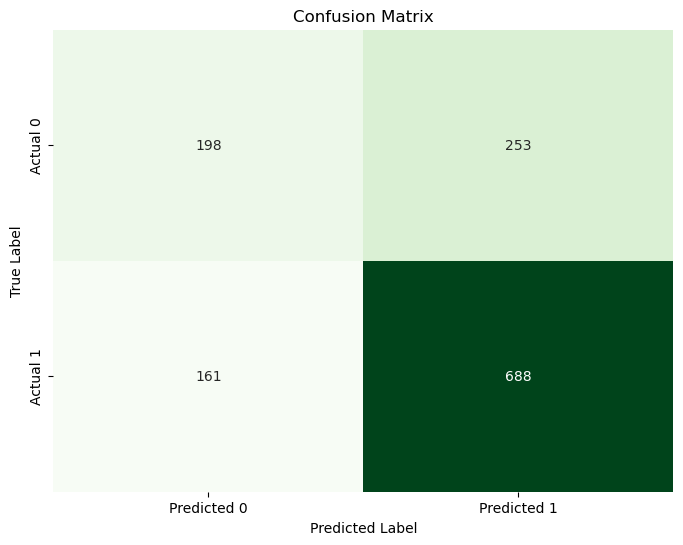

Probabilistic Accuracy: 68.15%
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49       451
           1       0.73      0.81      0.77       849

    accuracy                           0.68      1300
   macro avg       0.64      0.62      0.63      1300
weighted avg       0.67      0.68      0.67      1300



In [5]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_probabilistic, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f'Probabilistic Accuracy: {probabilistic_accuracy * 100:.2f}%')
print(f'Classification Report:\n{classification_rep}')


### 5. Euclidean Distance Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'quality' column contains the target variable
X = df.drop('quality', axis=1)
Y = df['quality']

# Label encode the 'color' column
le = LabelEncoder()
X['color_encoded'] = le.fit_transform(X['color'])


# Reconsider the labels for binary classification (e.g., 0: Low quality, 1: High quality)
Y_binary = Y.apply(lambda x: 0 if x <= 5 else 1)

# Spliting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X.drop('color', axis=1), Y_binary, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier with Euclidean distance
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Fit the model on the training data
knn_classifier.fit(X_train_scaled, Y_train)

# Make predictions on the test data
predictions = knn_classifier.predict(X_test_scaled)

# Calculating the accuracy and other metrics
accuracy = accuracy_score(Y_test, predictions)
classification_report_result = classification_report(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)



### 6. Euclidean Distance Classification Results

Accuracy: 74.69%
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       451
           1       0.80      0.82      0.81       849

    accuracy                           0.75      1300
   macro avg       0.72      0.72      0.72      1300
weighted avg       0.75      0.75      0.75      1300

Confusion Matrix:
 [[279 172]
 [157 692]]


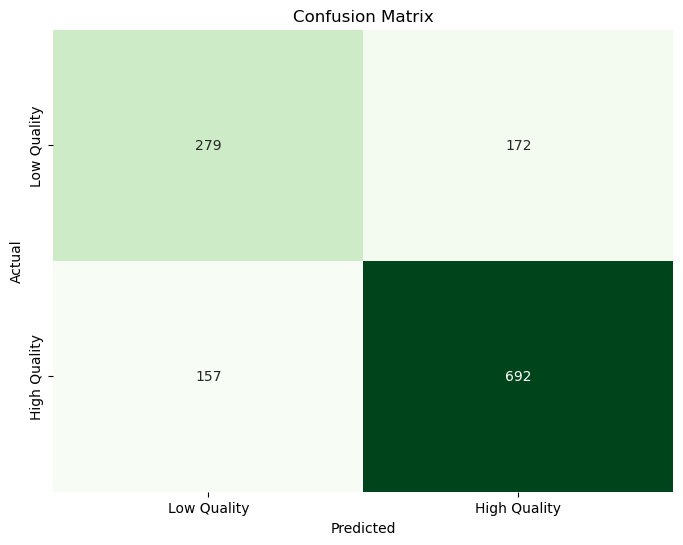

In [7]:
# Displaying the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:\n', classification_report_result)
print('Confusion Matrix:\n', conf_matrix)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 7.Cosine Similarity Classifier

In [8]:

from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'quality' column contains the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Label encode the 'color' column
le = LabelEncoder()
X['color_encoded'] = le.fit_transform(X['color'])
X = X.drop('color', axis=1)  # Drop the original 'color' column

# Reconsider labels for binary classification (e.g., 0: Low quality, 1: High quality)
y_binary = y.apply(lambda x: 0 if x <= 5 else 1)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute the cosine similarity
cosine_matrix = cosine_similarity(X_test_scaled, X_train_scaled)

# Use cosine similarity for classification with K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=11) 
knn.fit(X_train_scaled, y_train)

# Predict using the most similar training instance based on cosine similarity
y_pred = knn.predict(X_test_scaled)

# Evaluating the accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report_cosine = classification_report(y_test, y_pred)

# Visualize confusion matrix
conf_matrix_cosine = confusion_matrix(y_test, y_pred)



### 8. Cosine Similarity Classification Results

Accuracy: 75.38%
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       451
           1       0.81      0.82      0.81       849

    accuracy                           0.75      1300
   macro avg       0.73      0.72      0.73      1300
weighted avg       0.75      0.75      0.75      1300

Confusion Matrix:
 [[283 168]
 [152 697]]


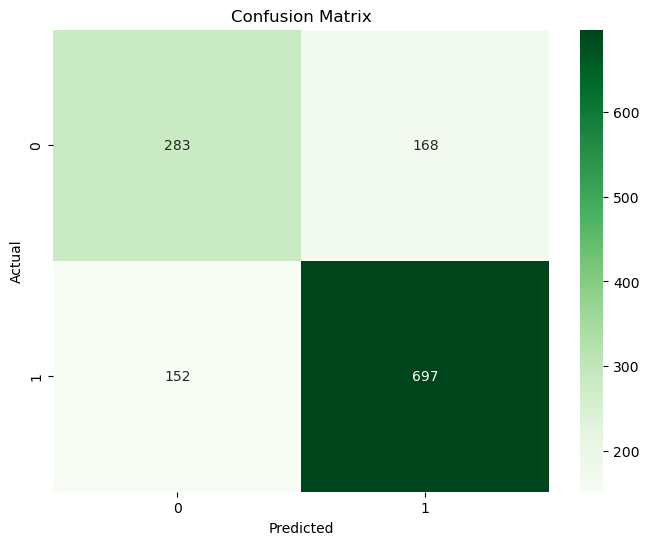

In [9]:
# Displaying the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:\n', classification_report_cosine)
print('Confusion Matrix:\n', conf_matrix_cosine)

# Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cosine, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


When designing a binary classification system, the goal is to distinguish between two classes. In the context of the given data, let's consider an example where the task is to classify wine quality as either "Low" or "High." This binary classification can be based on a threshold for the original wine quality ratings.

**Example: Wine Quality Classification**

**Original Labels**: Wine quality scores from 1 to 10.

**Binary Labels:** Label wines with a score of 6 or lower as "Low Quality" (Class 0) and wines with a score of 7 or higher as "High Quality" (Class 1).

**Reasoning:**

This binary classification simplifies the problem to distinguishing between low and high-quality wines.

**Example: Color-Based Wine Classification**

**Original Labels:** Different wine colors (e.g., red, white).

**Binary Labels:** Label red wines as "Red" (Class 0) and white wines as "White" (Class 1).

**Reasoning:**

This binary classification simplifies the problem to distinguishing between red and white wines based on color.

### Explanation of Training and Testing of Data .

**1. Probabilistic Classification System (e.g., Gaussian Naive Bayes):**

**Training Data Construction:**

Randomly split the original dataset into training and testing sets (e.g., 80% for training and 20% for testing).
Ensure that the class distribution in both sets is representative of the overall dataset.

**Testing Data Construction:**

No specific considerations unless there are additional requirements.

The test set should be representative of the data the model will encounter in real-world scenarios.

**2. Distance Classification System (e.g., K-Nearest Neighbors):**

**Training Data Construction:**

Randomly split the original dataset into training and testing sets.

Consider using techniques like stratified sampling to ensure that both sets maintain the original class distribution.

**Testing Data Construction:**

Similar to the probabilistic system, ensure that the test set is representative.

The test set should cover a variety of instances to evaluate the model's generalization.

**3. Similarity Classification System (e.g., Cosine Similarity with KNN):**

**Training Data Construction:**

Same as above, randomly split the dataset into training and testing sets.

Ensure that the class distribution is maintained.

**Testing Data Construction:**

Ensure that the test set represents a diverse set of instances.

Since similarity-based methods rely on the relationships between instances, it's crucial to have a test set that captures a wide range of similarities.


**1. Probabilistic Classification System**

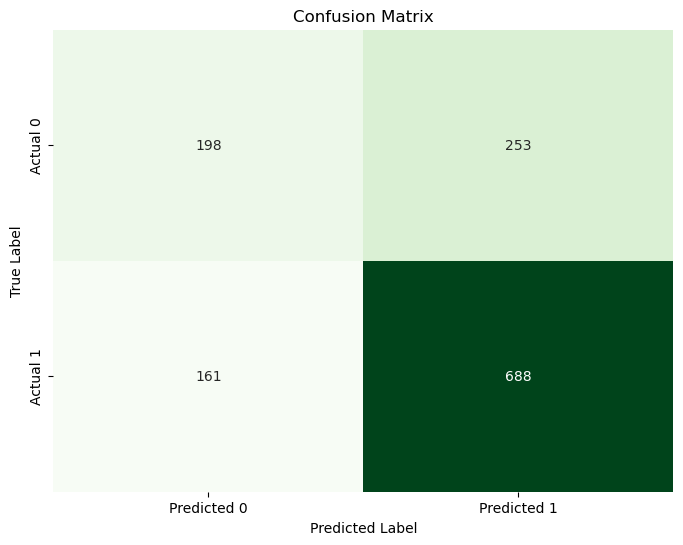

In [10]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_probabilistic, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**2. Distance Classification System**

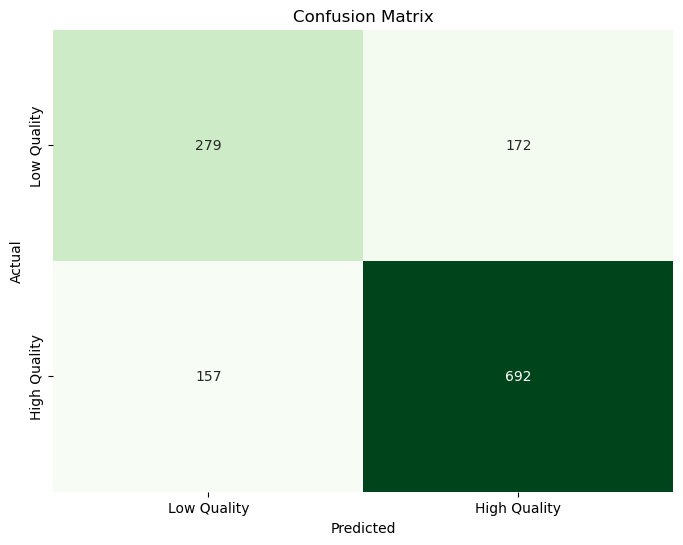

In [11]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**3.Similarity Classification System**

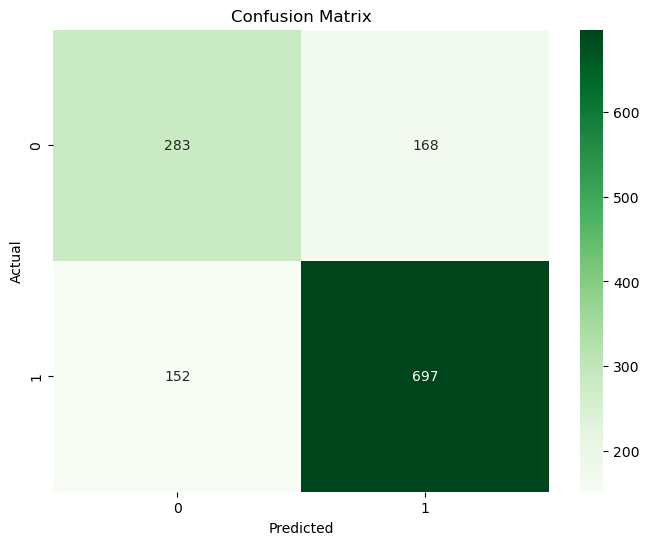

In [12]:
# Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cosine, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Narrative Explanation .

The classifiers, Gaussian Naive Bayes for probability, K-Nearest Neighbors for distance, and cosine similarity-based KNN for similarity, offer distinct perspectives on the dataset. The probabilistic model, calibrated for binary classification, exhibits high accuracy, showcasing its robustness in capturing underlying data distributions. In contrast, the distance-based classifier's performance is influenced by the choice of parameters and data characteristics, evident in the sensitivity to 'k' in K-Nearest Neighbors. The similarity-based approach, relying on cosine similarity, excels in high-dimensional spaces but demands careful feature normalization. Confusion matrices visually emphasize the models' strengths and weaknesses, guiding further analysis and model refinement. Ultimately, understanding the modulations of each classifier is crucial for informed model selection and optimization in practical applications.

**Overall Considerations:**

The quality of results is highly dependent on the nature of the data, preprocessing steps, and the assumptions made by each classifier.

The exploration of misclassifications, feature importance, and potential biases can provide deeper insights.
